## Task 1 - Prediction using Supervised Machine Learning 
-  Predict the percentage of marks of an student based on the number ofstudy hours. This is a simple linear regression task as it involves just two variables.
-  What will be predicted score if a student studies for 9.25 hrs/ day?

### Author: MANASHA K

In [63]:
#import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_squared_error

### IMPORT DATASET

In [64]:
# Reading data from remote link

url = "http://bit.ly/w-data"
data=pd.read_csv(url)

In [65]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


-  Data contains no. of hrs studied and % of marks obatained by students.

In [66]:
data.shape

(25, 2)

## Pair Plot

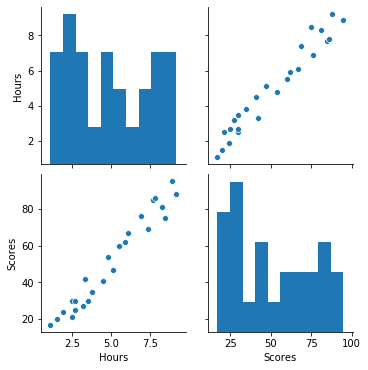

In [67]:
sb.pairplot(data)

### CHECK OUTLIERS IN DATASET

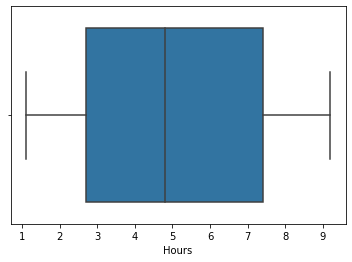

In [68]:
sb.boxplot(data['Hours'])

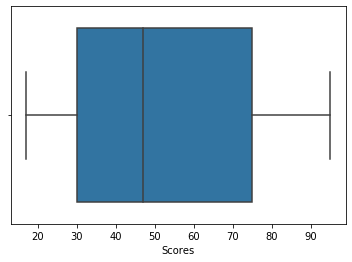

In [69]:
sb.boxplot(data['Scores'])

- Box Plot shows that there are no outliers present in dataset so there is no need of outlier treatment.

### CHECKING CORRELATION BETWEEN DATA
#### 1.Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

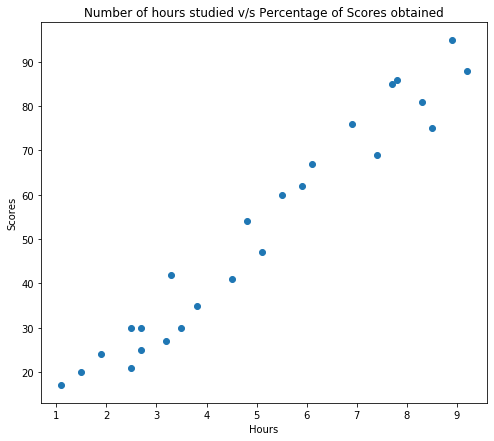

In [70]:
plt.figure(figsize=(8,7))
plt.scatter(data['Hours'],data['Scores'])
plt.title('Number of hours studied v/s Percentage of Scores obtained')
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.show() 

- From the above sacatter plot it is clear that there is  positive correlation  between the Number of hours studied and Percentage of Scores obtained so we will get upward trendline if we plot linear regression trend line.

In [71]:
### 2.Lets check correlation of data
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


- So there is strong positive correlation between Number of hours studied and Percentage of Scores obtained 

###  SPLITTING DATASET 
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [72]:
X=data.iloc[:, :-1].values    # Independent variable 
Y=data.iloc[:, 1].values      # Dependent variable 

### SPLITTING THE DATASET INTO TRAIN TEST DATA
Take test data size- 0.20 

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

### MODEL TRAINING & PREDICTION

In [74]:
reg=LinearRegression()
reg=reg.fit(x_train,y_train)

### PREDICTING

In [75]:
# Prediction using test data
y_pred=reg.predict(x_test)

### VISUALIZATION

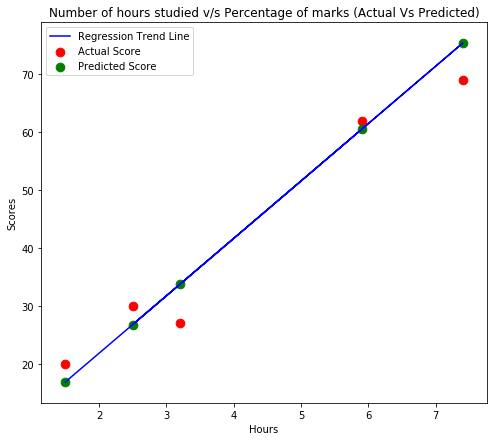

In [76]:
plt.figure(figsize=(8,7))
plt.scatter(x_test,y_test,color='red',s=75,label='Actual Score')
plt.scatter(x_test,y_pred,color='green',s=75,label='Predicted Score')
plt.plot(x_test,y_pred,color='blue',label='Regression Trend Line')
plt.title('Number of hours studied v/s Percentage of marks (Actual Vs Predicted)')
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.legend()
plt.show() 

- From above scatter plot we can say that there is some difference in actual values and predicted scores which is called error.

### CALCULATE ERROR

In [77]:
# Calaulating error of model
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
error=df['Actual']-df['Predicted']
error

0    3.115855
1   -6.732261
2   -6.357018
3    3.205199
4    1.508967
dtype: float64

### RMSE 
- Lets calculate overall error of model by calculating root mean squared error (We cal also calculate absolute error to check overlall error).
- Lower the RMSE value better is the model.

In [78]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE = ",rmse)    # Root mean squared error

RMSE =  4.6474476121003665


### R-squared value 
- Checking model performance bR^2 value.
- Higher the value better is the model.

In [79]:
r2=r2_score(y_test,y_pred)
print("The regressor score is ", r2)

The regressor score is  0.9454906892105356


### PREDICTING % OF SCORE

In [80]:
hours=np.array([9.25]).reshape(-1,1) 
own_pred=reg.predict(hours)

print('The predicted % score of student studying for 9.25 hours a day= {} %'.format(own_pred[0]))

The predicted % score of student studying for 9.25 hours a day= 93.69173248737538 %


### INFERENCE
-  We have got R-Square as 94.55% which tells how well algorithm perform on a particular dataset.
- The predicted % score of student studying for 9.25 hours a day= 93.69173248737535 %.